# Unveiling Trends in Renewable Energy 🌍🔋
### The Data Analyst Wizard

## 📖 Background
The race to net-zero emissions is on! As the world battles climate change and rising energy demands, renewable energy is taking center stage. Solar, wind, and hydro are revolutionizing the way we power our lives. Some countries are leading the charge, while others are falling behind. But which nations are making the biggest impact? What’s driving their success? And what lessons can we learn to accelerate the green energy transition?

As a data analyst at NextEra Energy, one of the world’s leading renewable energy providers, your mission is to dive deep into global trends and uncover the story behind the surge in clean energy. Using real-world data, you'll explore how economic, demographic, and environmental factors (like GDP, population, carbon emissions, and policy influence) shape energy production around the world.

So dig into the data, reveal the story behind the numbers, and create stunning visualizations that spark action! ⚡🌱

## 💾 The data 
Your team has gathered a **global renewable energy dataset** covering energy production, investments, policies, and economic factors shaping renewable adoption worldwide:  

## 🌍 Basic Identifiers  
- **`Country`** – Country name  
- **`Year`** – Calendar year (YYYY)  
- **`Energy Type`** – Type of renewable energy (e.g., Solar, Wind)  

#### ⚡ Energy Metrics  
- **`Production (GWh)`** – Renewable energy produced (Gigawatt-hours)  
- **`Installed Capacity (MW)`** – Installed renewable capacity (Megawatts)  
- **`Investments (USD)`** – Total investment in renewables (US Dollars)  
- **`Energy Consumption (GWh)`** – Total national energy use  
- **`Energy Storage Capacity (MWh)`** – Capacity of energy storage systems  
- **`Grid Integration Capability (Index)`** – Scale of 0–1; ability to handle renewables in grid  
- **`Electricity Prices (USD/kWh)`** – Average cost of electricity  
- **`Energy Subsidies (USD)`** – Government subsidies for energy sector  
- **`Proportion of Energy from Renewables (%)`** – Share of renewables in total energy mix  

#### 🧠 Innovation & Tech  
- **`R&D Expenditure (USD)`** – R&D spending on renewables  
- **`Renewable Energy Patents`** – Number of patents filed  
- **`Innovation Index (Index)`** – Global innovation score (0–100)  

#### 💰 Economy & Policy  
- **`GDP (USD)`** – Gross domestic product  
- **`Population`** – Total population  
- **`Government Policies`** – Number of policies supporting renewables  
- **`Renewable Energy Targets`** – Whether national targets are in place (1 = Yes, 0 = No)  
- **`Public-Private Partnerships in Energy`** – Number of active collaborations  
- **`Energy Market Liberalization (Index)`** – Scale of 0–1  

#### 🧑‍🤝‍🧑 Social & Governance  
- **`Ease of Doing Business (Score)`** – World Bank index (0–100)  
- **`Regulatory Quality`** – Governance score (-2.5 to 2.5)  
- **`Political Stability`** – Governance score (-2.5 to 2.5)  
- **`Control of Corruption`** – Governance score (-2.5 to 2.5)  

#### 🌿 Environment & Resources  
- **`CO2 Emissions (MtCO2)`** – Emissions in million metric tons  
- **`Average Annual Temperature (°C)`** – Country’s avg. temp  
- **`Solar Irradiance (kWh/m²/day)`** – Solar energy availability  
- **`Wind Speed (m/s)`** – Average wind speed  
- **`Hydro Potential (Index)`** – Relative hydropower capability (0–1)  
- **`Biomass Availability (Tons/year)`** – Total available biomass  

## 💪 Challenge

As a data analyst at NextEra Energy, your mission is to explore a rich, multi-dimensional dataset and uncover powerful insights about global renewable energy trends.

Your submission should focus on:

1. **🌍 Exploratory Insights:**  
   Alongside your model, include analysis addressing key trends:
   - Which regions are investing the most efficiently in renewables?
   - How do economic, environmental, and policy factors relate to production levels?

2. **📊 Visual Storytelling:**  
   Create at least one compelling visualization to showcase a key insight about global renewable energy trends.

🔎 Your analysis will uncover trends, spotlight key drivers, and guide smarter global energy decisions. Policymakers, investors, and sustainability leaders are hungry for clarity. Your insights could influence real-world energy strategies and help accelerate the path to a more sustainable future. 


## 🧑‍⚖️ Judging Criteria
This is a **community-based** competition. Once the competition concludes, you'll have the opportunity to view and vote for the best submissions.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the introduction to data science notebooks, so the workbook is focused on your story.
- Check that all the cells run without error.

## ⏳ Data is the new fuel - let’s generate insights and electrify the future!

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/Training_set_augmented.csv', sep=',')
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                2400 non-null   object 
 1   Year                                   2400 non-null   int64  
 2   Energy Type                            2400 non-null   object 
 3   Production (GWh)                       2400 non-null   float64
 4   Installed Capacity (MW)                2400 non-null   float64
 5   Investments (USD)                      2400 non-null   float64
 6   Energy Consumption                     2400 non-null   float64
 7   Energy Storage Capacity                2400 non-null   float64
 8   Grid Integration Capability            2400 non-null   float64
 9   Electricity Prices                     2400 non-null   float64
 10  Energy Subsidies                       2400 non-null   float64
 11  Prop

,Year,Production (GWh),Installed Capacity (MW),Investments (USD),Energy Consumption,Energy Storage Capacity,Grid Integration Capability,Electricity Prices,Energy Subsidies,Proportion of Energy from Renewables,R&D Expenditure,Renewable Energy Patents,Innovation Index,GDP,Population,Government Policies,Renewable Energy Targets,Public-Private Partnerships in Energy,Energy Market Liberalization,Ease of Doing Business,Regulatory Quality,Political Stability,Control of Corruption,CO2 Emissions,Average Annual Temperature,Solar Irradiance,Wind Speed,Hydro Potential,Biomass Availability
count,2400.000000,2400.000000,2400.000000,2.400000e+03,2400.000000,2400.000000,2400.000000,2400.000000,2.400000e+03,2400.000000,2.400000e+03,2400.000000,2400.000000,2.400000e+03,2.400000e+03,2400.000000,2400.00000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,2011.317083,48507.597794,24621.672674,4.912714e+09,498127.211279,510.173633,0.493593,0.274276,5.005477e+08,49.517801,5.010420e+09,501.262083,50.750415,1.003899e+14,7.493085e+08,0.505417,0.49625,0.504583,0.485417,48.599953,5.004429,5.048305,5.057416,494053.740267,15.534648,199.783263,7.522615,50.370034,49.426041
std,6.849532,28482.051661,14582.014989,2.914939e+09,291737.182600,291.702943,0.287032,0.131721,2.915630e+08,28.985966,2.851598e+09,287.279109,28.707836,5.738329e+13,4.354413e+08,0.500075,0.50009,0.500083,0.499891,28.883182,2.872392,2.901588,2.907166,288826.258454,14.400348,58.269010,4.383503,28.789301,29.158277
min,2000.000000,1016.662699,114.531639,5.886994e+06,1264.851083,1.047366,0.000484,0.050052,1.240307e+06,0.033829,1.224539e+06,1.000000,0.025733,5.603965e+10,1.255357e+06,0.000000,0.00000,0.000000,0.000000,0.025281,0.000172,0.004909,0.000973,1124.768458,-9.981787,100.173426,0.000752,0.046465,0.004502
25%,2006.000000,23713.371715,11865.315597,2.413680e+09,240782.386125,255.646055,0.247019,0.161345,2.486766e+08,23.388536,2.599603e+09,261.750000,26.402896,5.083596e+13,3.812790e+08,0.000000,0.00000,0.000000,0.000000,23.233737,2.510008,2.481938,2.617690,245885.643325,3.170828,148.246654,3.707585,25.713784,24.461351
50%,2011.000000,47094.742844,24288.819437,4.823982e+09,498808.983650,512.955253,0.488448,0.271975,5.028603e+08,50.155636,4.941333e+09,495.000000,51.512278,1.012135e+14,7.537116e+08,1.000000,0.00000,1.000000,0.000000,48.366186,4.930499,5.036947,5.055620,482994.509950,15.706685,199.384309,7.550975,50.080583,49.778471
75%,2017.000000,73151.386145,37250.894132,7.473797e+09,754802.687875,762.029907,0.746684,0.390959,7.515837e+08,74.096443,7.434587e+09,752.250000,75.305663,1.502345e+14,1.119419e+09,1.000000,1.00000,1.000000,1.000000,73.403817,7.546402,7.490262,7.707206,748549.571600,28.333490,251.285401,11.375103,75.180238,74.181529
max,2023.000000,99949.788616,49997.387580,9.998292e+09,999618.512200,999.600172,0.998914,0.499893,9.999049e+08,99.988355,9.998519e+09,1000.000000,99.998838,1.999223e+14,1.499494e+09,1.000000,1.00000,1.000000,1.000000,99.894043,9.995321,9.997659,9.998930,999816.500200,39.980937,299.998364,14.994636,99.981556,99.993600


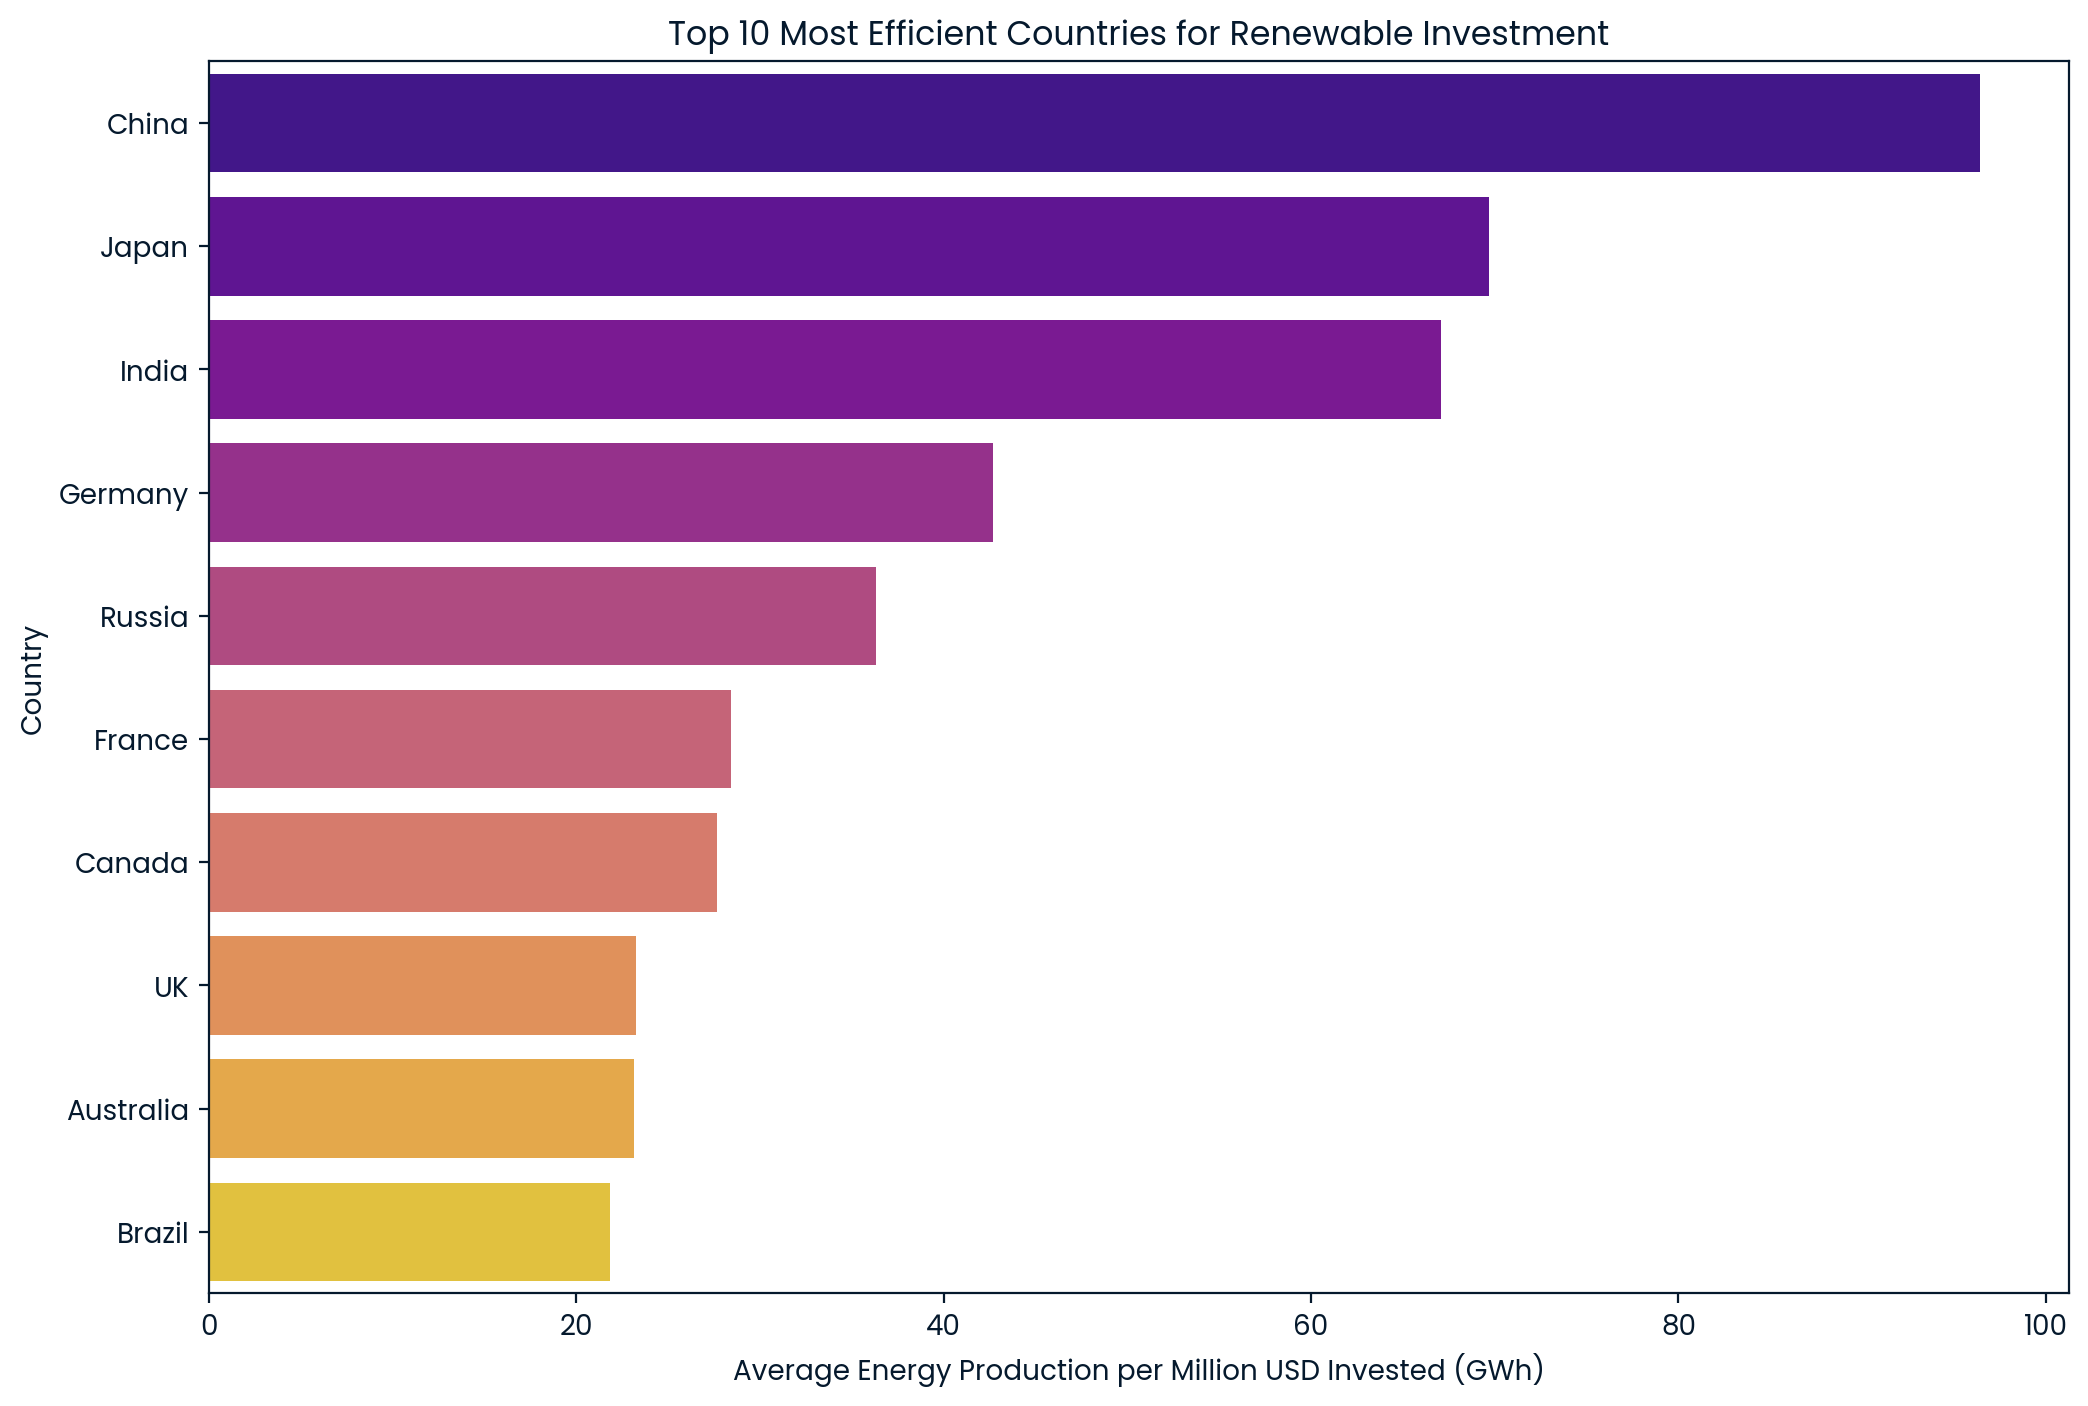

In [115]:
# Which regions are investing the most efficiently in renewables?

df_clean = df[df['Investments (USD)'] > 0].dropna(subset=['Production (GWh)'])
df_clean['Efficiency'] = (df_clean['Production (GWh)'] / df_clean['Investments (USD)']) * 1000000
country_efficiency = df_clean.groupby('Country')['Efficiency'].mean()
top_10_efficient = country_efficiency.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_efficient.values, y=top_10_efficient.index, palette='plasma')
plt.title('Top 10 Most Efficient Countries for Renewable Investment')
plt.xlabel('Average Energy Production per Million USD Invested (GWh)')
plt.ylabel('Country')

plt.savefig('feature_importance.png')


Production (GWh)                        1.000000
Solar Irradiance                        0.020564
Proportion of Energy from Renewables    0.014610
Wind Speed                              0.013714
Hydro Potential                         0.012027
CO2 Emissions                          -0.001342
Political Stability                    -0.003095
Investments (USD)                      -0.004613
Population                             -0.008020
Control of Corruption                  -0.008909
Regulatory Quality                     -0.013048
Ease of Doing Business                 -0.015294
Biomass Availability                   -0.019978
Installed Capacity (MW)                -0.031234
GDP                                    -0.031673
Name: Production (GWh), dtype: float64


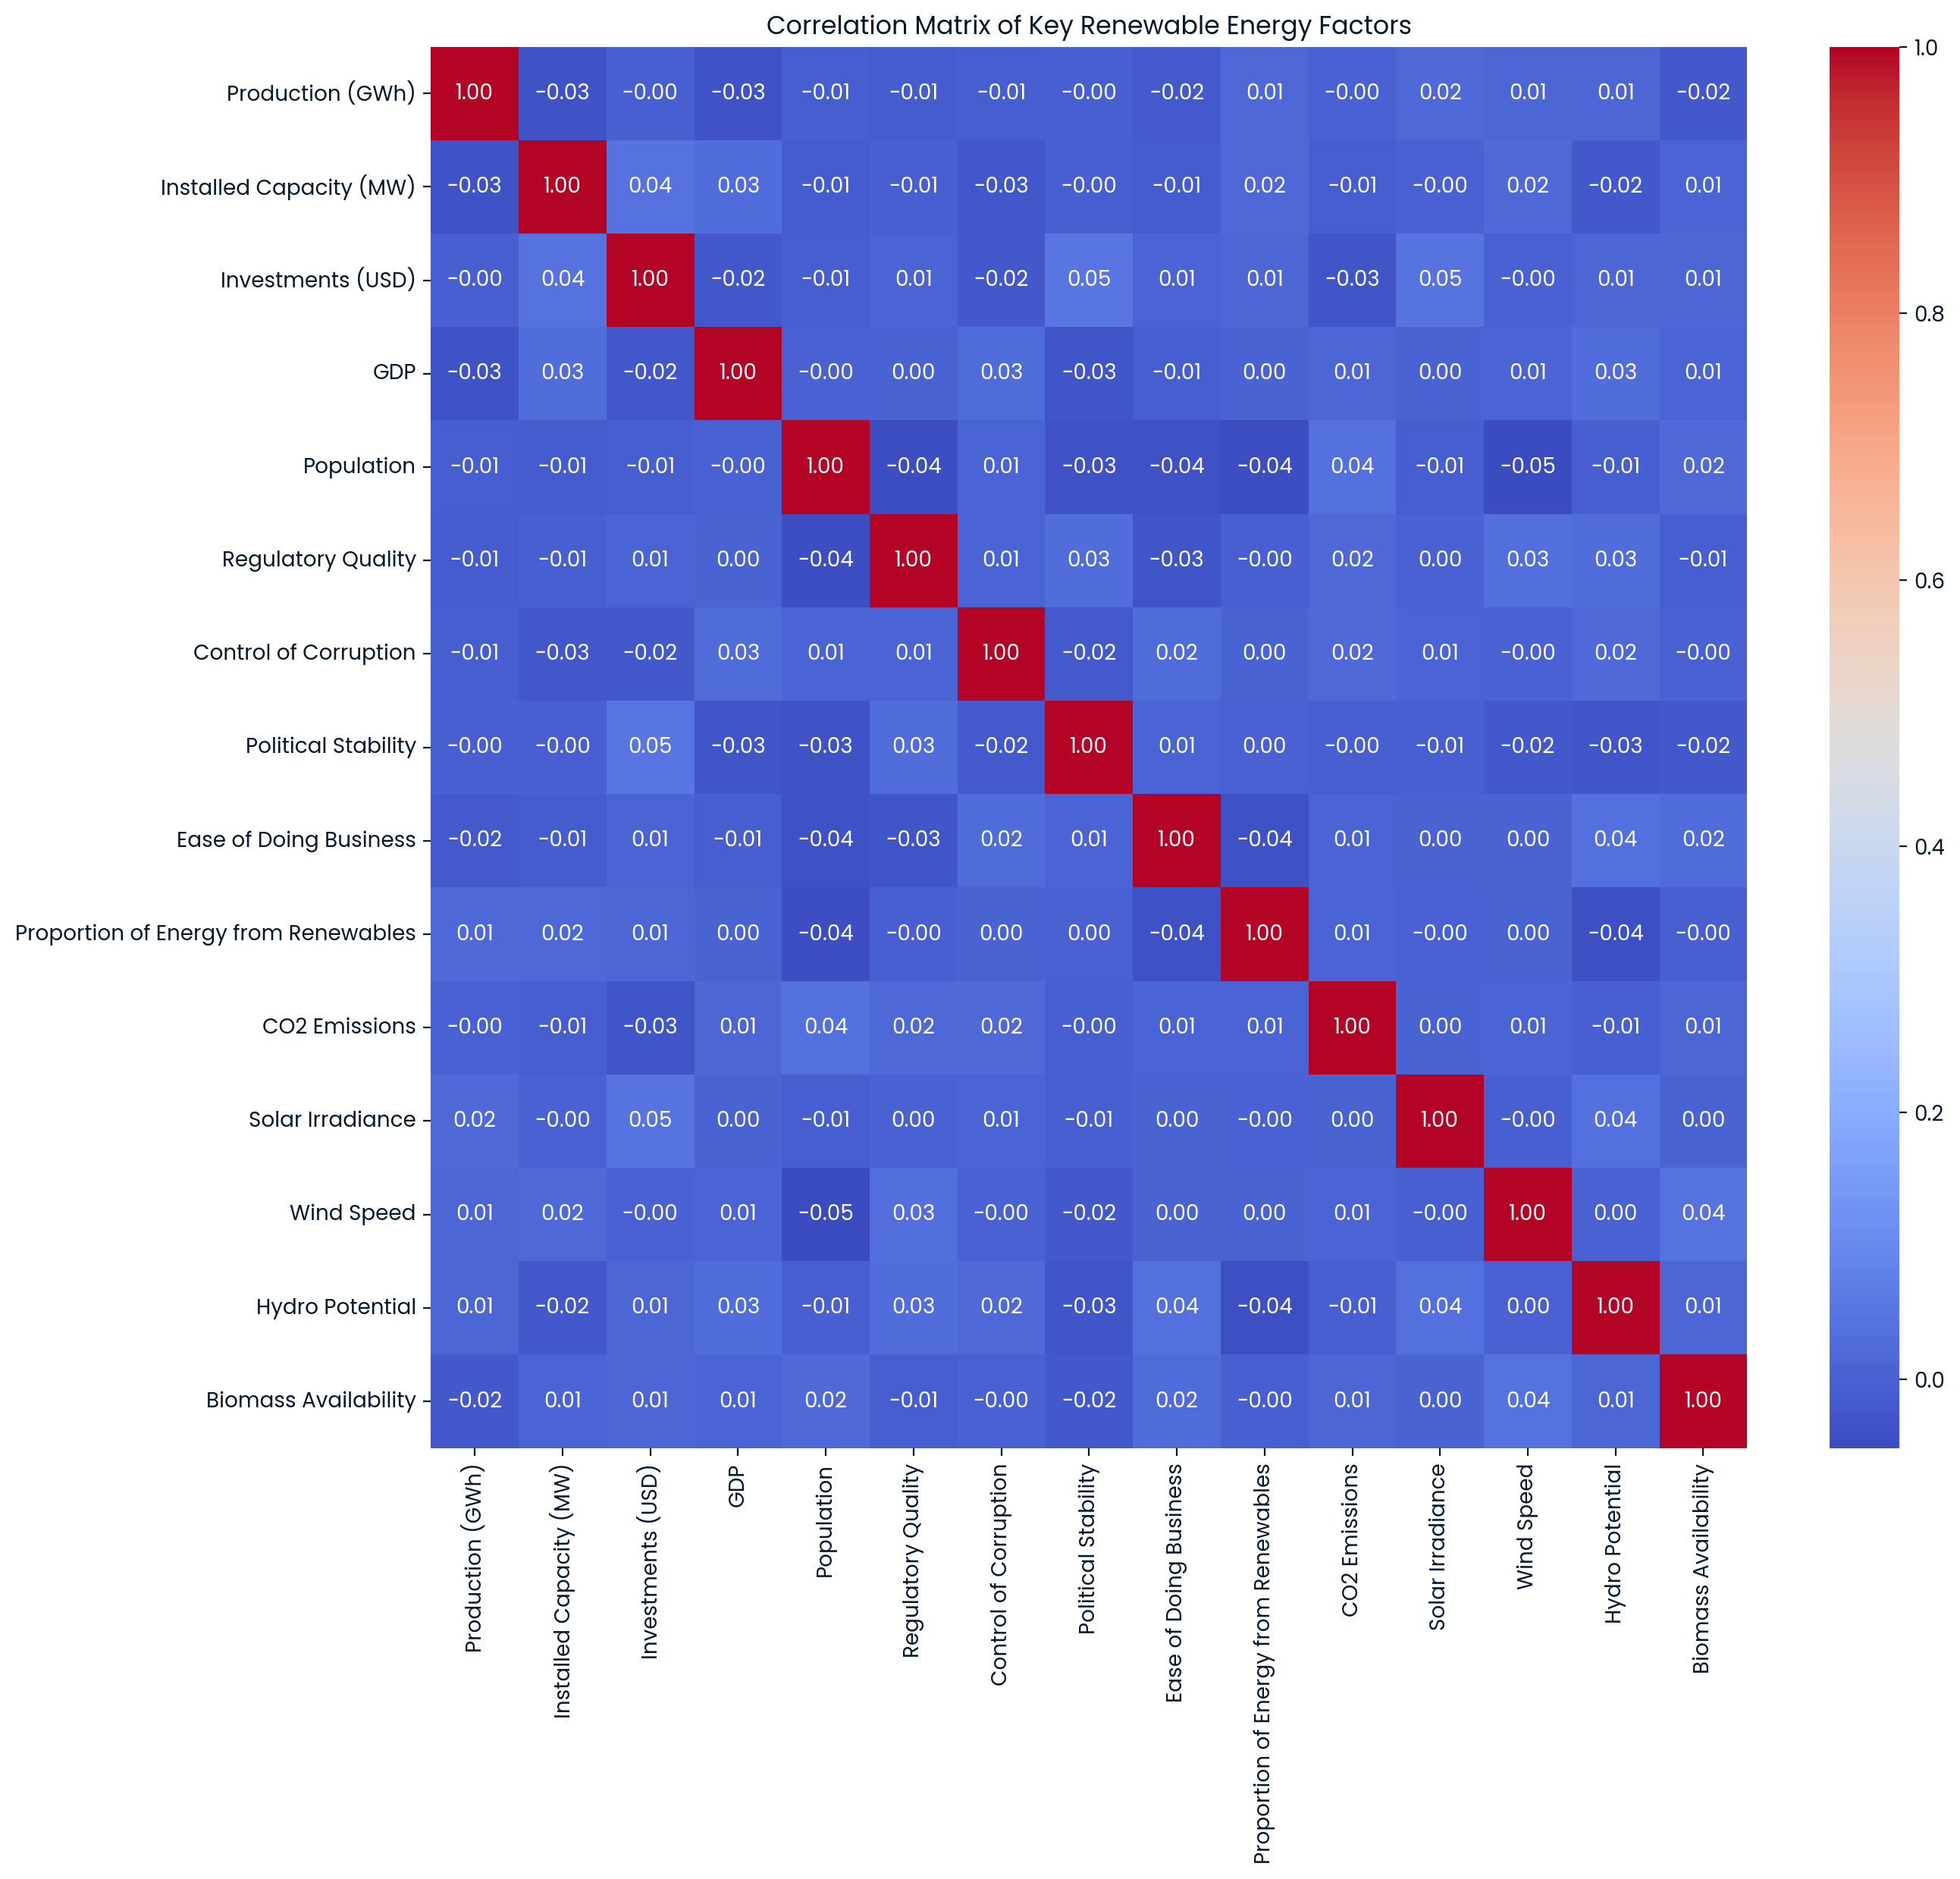

In [116]:
# How do economic, environmental, and policy factors relate to production levels?

analysis_columns = [
    'Production (GWh)',
    'Installed Capacity (MW)',
    'Investments (USD)',
    'GDP',
    'Population',
    'Regulatory Quality',
    'Control of Corruption',
    'Political Stability',
    'Ease of Doing Business',
    'Proportion of Energy from Renewables',
    'CO2 Emissions',
    'Solar Irradiance',
    'Wind Speed',
    'Hydro Potential',
    'Biomass Availability'
]

df_corr = df[analysis_columns].dropna()
correlation_matrix = df_corr.corr()

production_correlations = correlation_matrix['Production (GWh)'].sort_values(ascending=False)

# This would print the sorted list of correlations.
print(production_correlations)

# Create the heatmap visualization.
plt.figure(figsize=(14, 12))
sns.heatmap(
    correlation_matrix,
    annot=True, # Display the correlation values on the map
    fmt=".2f",  # Format values to two decimal places
    cmap='coolwarm' # Use a color scheme where red is positive, blue is negative
)
plt.title('Correlation Matrix of Key Renewable Energy Factors')

plt.savefig('correlation_heatmap.png')


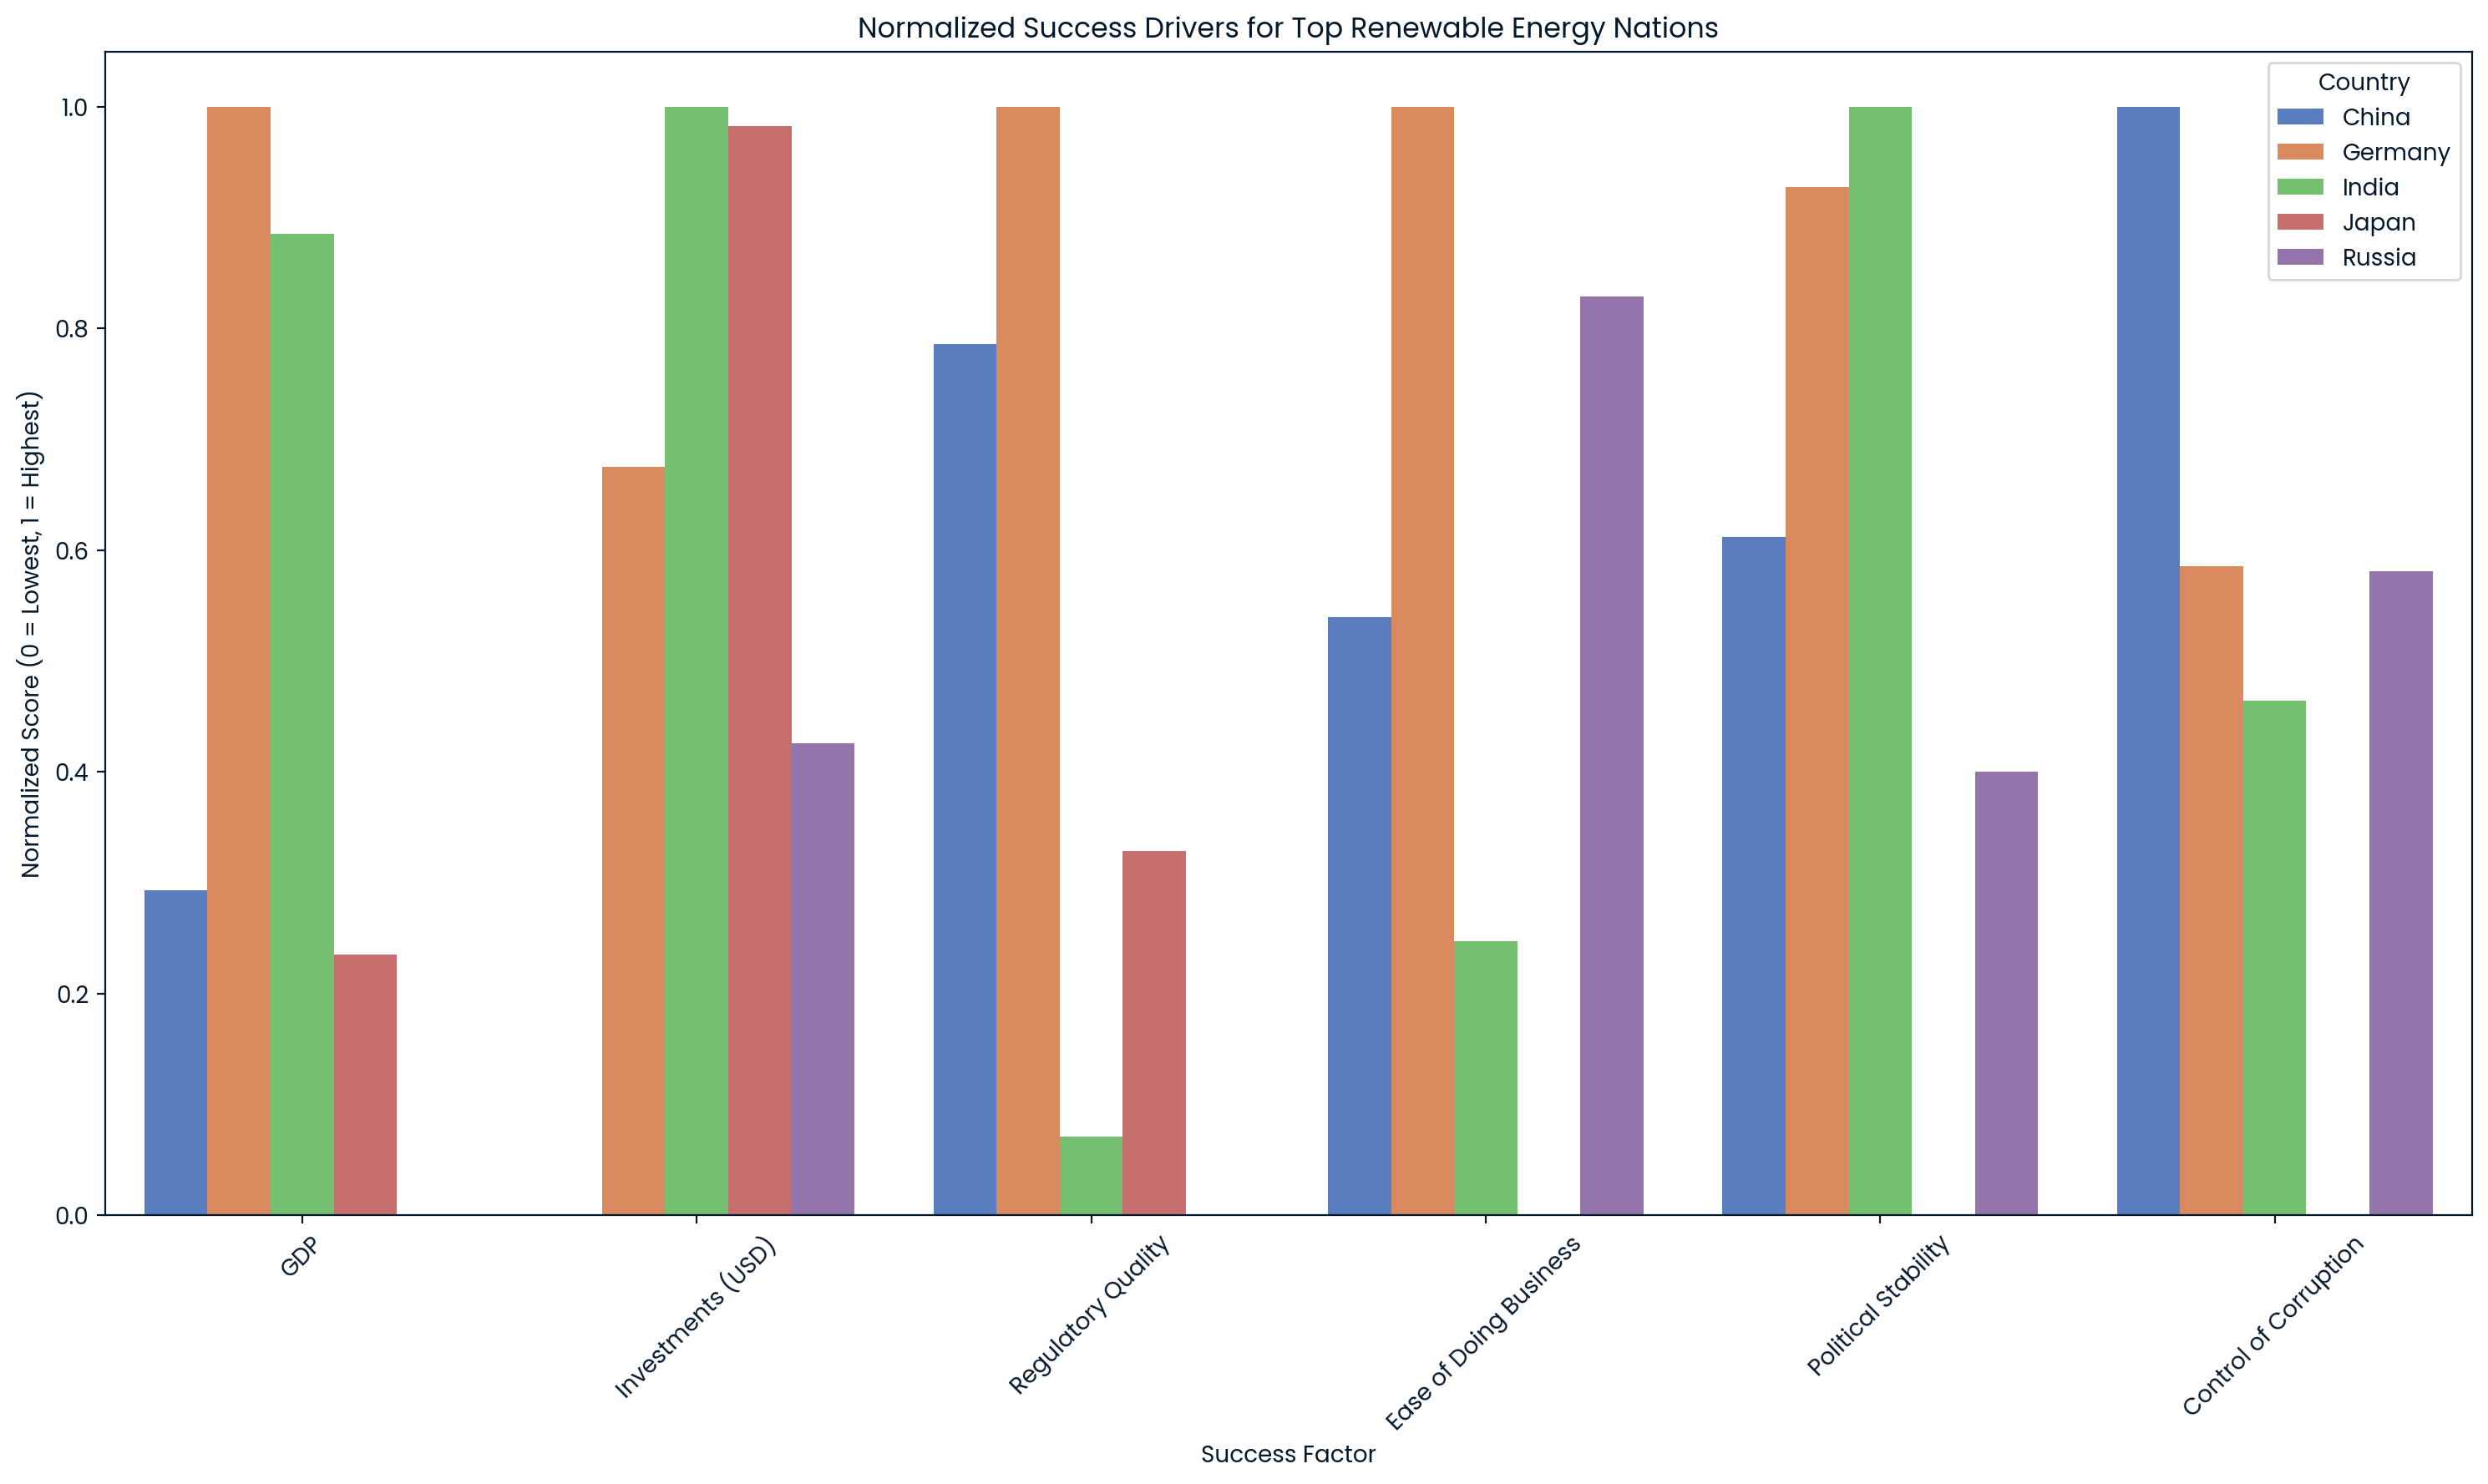

In [117]:
from sklearn.preprocessing import MinMaxScaler

top_countries = ['China', 'Japan', 'India', 'Germany', 'Russia']
df_top = df[df['Country'].isin(top_countries)]

# Select the key factors for comparison.
key_factors = [
    'GDP',
    'Investments (USD)',
    'Regulatory Quality',
    'Ease of Doing Business',
    'Political Stability',
    'Control of Corruption'
]

# Group by country and calculate the average for each factor.
df_avg_factors = df_top.groupby('Country')[key_factors].mean()

#  Normalize the data using MinMaxScaler.
# This scales each factor's values to a range between 0 and 1.
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_avg_factors),
                               index=df_avg_factors.index,
                               columns=df_avg_factors.columns).reset_index()

# "Melt" the DataFrame to prepare it for a grouped bar plot.
df_melted = df_normalized.melt(id_vars='Country',
                               var_name='Success Factor',
                               value_name='Normalized Score')

# Create the updated, normalized bar plot.
plt.figure(figsize=(15, 9))
sns.barplot(x='Success Factor', y='Normalized Score', hue='Country',
            data=df_melted, palette='muted')

plt.title('Normalized Success Drivers for Top Renewable Energy Nations')
plt.xlabel('Success Factor')
plt.ylabel('Normalized Score (0 = Lowest, 1 = Highest)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('normalized_success_drivers.png')